<a href="https://colab.research.google.com/github/hersan19/Uk_AprendizajeAutomatico/blob/main/Aprendizaje_Autom%C3%A1tico_S3_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/



Se lee un archivo csv utilizando la bilbiote pandas.
df.head() muestra los primeros 5 renglones. Si se usa un argumento, será un número entero para mostrar


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje_Automatico/housing.csv') # leer los datos, csv, parquet, arrf.

df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

df.tail() regresa los 5 últimos renglones

In [ ]:
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Si queremos conocer los nombres de las columna o los nombres de los índices se utiliza df.columns y df.index

In [ ]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [ ]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

Con df.describe() se puede obtener información estadística sobre las columnas numéricas en el dataset.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


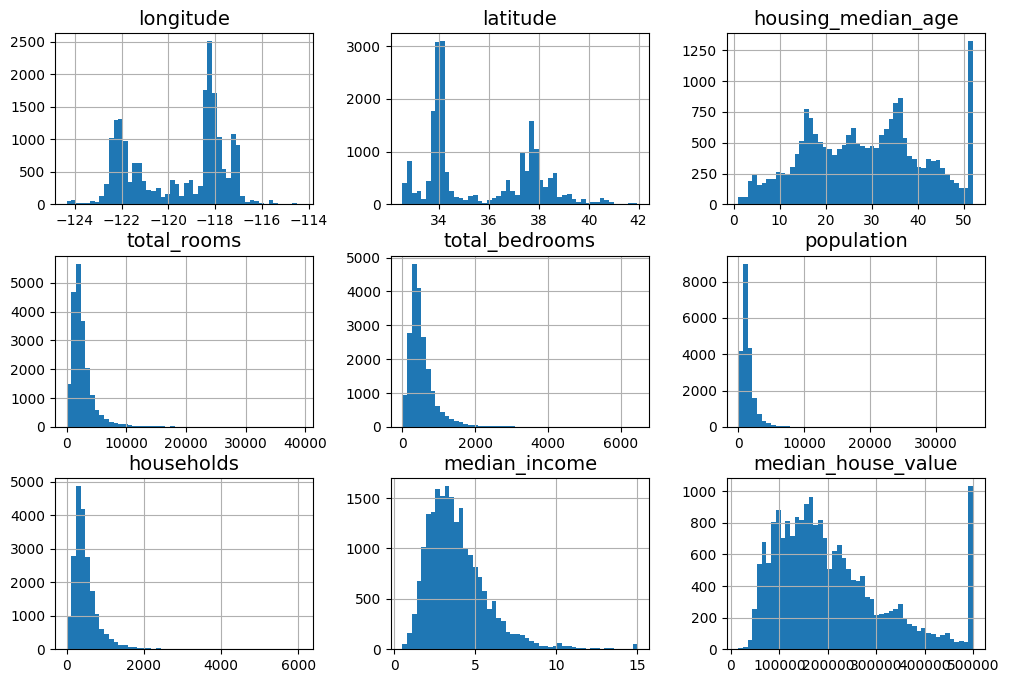

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

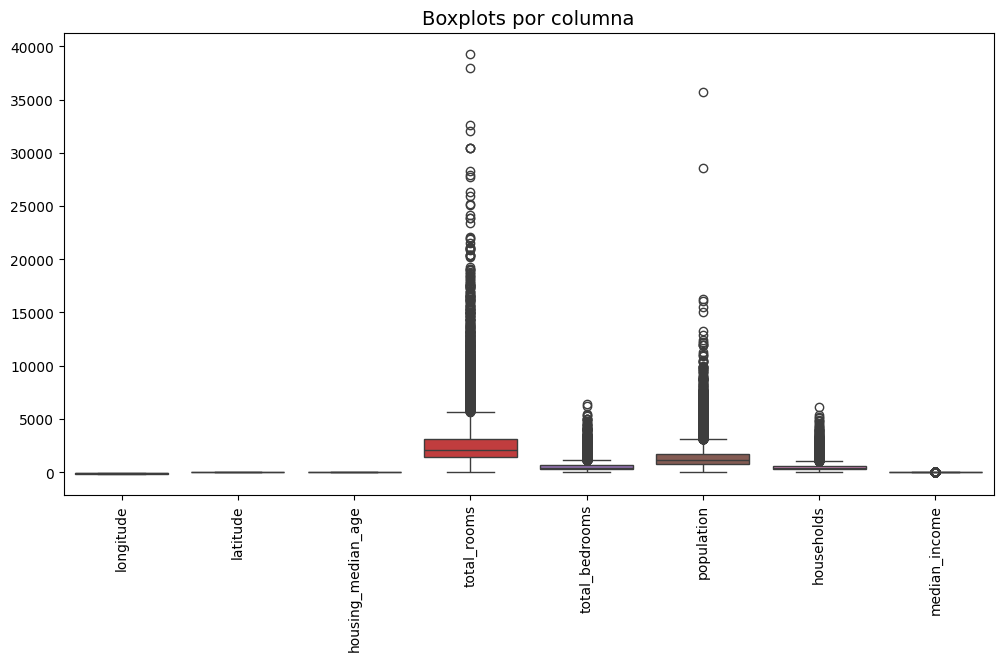

In [ ]:
df_sin_median_house_value = df.drop('median_house_value',axis=1)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_median_house_value.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplots por columna")
plt.show()

# Selección
Si queremos seleccionar un subconjunto de datos de un DataFrame, es necesario indicar dicho subconjunto mediante corchetes [] después del DataFrame. El subconjunto se puede especificar de varias formas. Si queremos seleccionar sólo una columna de un DataFrame, sólo necesitamos poner su nombre entre corchetes. El resultado será una estructura de datos Series, no un DataFrame, porque sólo se recupera una columna.

In [ ]:
df['population']

,population
0,322.0
1,2401.0
2,496.0
3,558.0
4,565.0
...,...
20635,845.0
20636,356.0
20637,1007.0
20638,741.0


Si queremos seleccionar un subconjunto de filas de un DataFrame, podemos hacerlo indicando un rango de filas separadas por : dentro de los corchetes. Esto se conoce comúnmente como una porción de filas.

La siguiente instrucción devuelve la porción de filas desde la posición 10 a la 13. Tenga en cuenta que la porción no utiliza las etiquetas de índice como referencias, sino la posición. En este caso, las etiquetas de las filas simplemente coinciden con la posición de las filas.

In [ ]:
df[0:14]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Si queremos seleccionar un subconjunto de columnas y filas utilizando las etiquetas como referencias en lugar de las posiciones, podemos utilizar la indexación loc:

La siguiente instrucción devolverá todas las filas entre los índices especificados en la porción antes de la coma y las columnas especificadas como una lista después de la coma. En este caso, loc hace referencia a las etiquetas de índice, lo que significa que loc no devuelve las filas 90 a 94, sino todas las filas entre la fila etiquetada 90 y la fila etiquetada 94; por lo tanto, si el índice 100 se coloca entre las filas etiquetadas como 90 y 94, esta fila también se devolvería.

In [ ]:
df.loc[90:94,['total_rooms','population']]


,total_rooms,population
90,994.0,800.0
91,215.0,904.0
92,96.0,191.0
93,1055.0,718.0
94,1715.0,1327.0


# Filtrado

Otra forma de seleccionar un subconjunto de datos es mediante la aplicación de la indexación booleana. Esta indexación se conoce comúnmente como filtro. Por ejemplo, si queremos filtrar aquellos valores menores o iguales a 1425, podemos hacerlo de esta manera:

In [ ]:
df[df['population']>10000]
#df[df['population']>1425].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
6338,-117.88,33.96,16.0,19059.0,3079.0,10988.0,3061.0,5.5469,265200.0,<1H OCEAN
9019,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN
9040,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,144000.0,INLAND
9122,-118.10,34.57,7.0,20377.0,4335.0,11973.0,3933.0,3.3086,138100.0,INLAND
9145,-118.46,34.40,12.0,25957.0,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN
9697,-121.61,36.69,19.0,9899.0,2617.0,11272.0,2528.0,2.0244,118500.0,<1H OCEAN
9744,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,152800.0,<1H OCEAN


La indexación booleana utiliza el resultado de una operación booleana sobre los datos, devolviendo una máscara con Verdadero o Falso para cada fila. Se seleccionarán las filas marcadas como Verdadero en la máscara. En el ejemplo anterior, la operación booleana df[df['population']>1425] produce una máscara booleana. Cuando un elemento en la columna 'population' es mayor que 1425, el valor correspondiente en la máscara se establece en Verdadero, de lo contrario se establece en Falso. Luego, cuando esta máscara se aplica como un índice en df[df['population']>1425], el resultado es un DataFrame filtrado que contiene solo filas con valores mayores que 1425. Por supuesto, se puede utilizar cualquiera de los operadores booleanos habituales para filtrar: < (menor que), <= (menor o igual que), > (mayor que), >= (mayor o igual que), = (igual a), !=(no igual a).

# Filtrado de valores Faltantes

Pandas utiliza el valor especial NaN (no un número) para representar valores faltantes. En Python, NaN es un valor de punto flotante especial que devuelven ciertas operaciones cuando uno de sus resultados termina en un valor indefinido. Una característica sutil de los valores NaN es que dos NaN nunca son iguales. Debido a esto, la única forma segura de saber si falta o no un valor en un DataFrame es utilizando la función isnull(). De hecho, esta función se puede utilizar para filtrar filas con valores faltantes:

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df[df['total_bedrooms'].isnull()].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


# Manipulación de los datos

Una vez que sabemos cómo seleccionar los datos deseados, lo siguiente que debemos saber es cómo manipularlos. Una de las cosas más sencillas que podemos hacer es operar con columnas o filas mediante funciones de agregación. La siguiente lista muestra las funciones de agregación más comunes.



<table>
  <tr>
    <th>Función</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>count()</td>
    <td>Número de observaciones que no son null</td>
  </tr>
  <tr>
    <td>sum()</td>
    <td>Suma de valores</td>
  </tr>
  <tr>
    <td>mean()</td>
    <td>Media de los valores</td>
  </tr>
  <tr>
    <td>median()</td>
    <td>Mediana aritmética de los valores</td>
  </tr>
  <tr>
    <td>min()</td>
    <td>Valor mínimo</td>
  </tr>
  <tr>
    <td>max()</td>
    <td>Valor máximo</td>
  </tr>
  <tr>
    <td>prod()</td>
    <td>Producto de valores</td>
  </tr>
  <tr>
    <td>std()</td>
    <td>Desviación std</td>
  </tr>
  <tr>
    <td>var()</td>
    <td>Varianza</td>
  </tr>
</table>

El resultado de todas estas funciones aplicadas a una fila o columna es siempre un número. Mientras tanto, si una función se aplica a un DataFrame o a una selección de filas y columnas, entonces se puede especificar si la función se debe aplicar a las filas de cada columna (poniendo la palabra clave axis=0 en la invocación de la función), o se debe aplicar a las columnas de cada fila (poniendo la palabra clave axis=1 en la invocación de la función).


Se debe tener en cuenta que estas son funciones específicas de Pandas, no funciones genéricas de Python. Existen diferencias en su implementación. En Python, los valores NaN se propagan a través de todas las operaciones sin generar una excepción. Por el contrario, las operaciones de Pandas excluyen los valores NaN que representan datos faltantes. Por ejemplo, la función max de pandas excluye los valores NaN, por lo que se interpretan como valores faltantes, mientras que la función max estándar de Python tomará la interpretación matemática de NaN y la devolverá como el máximo:

In [ ]:
df.max(axis=0)


,0
longitude,-114.31
latitude,41.95
housing_median_age,52.0
total_rooms,39320.0
total_bedrooms,6445.0
population,35682.0
households,6082.0
median_income,15.0001
median_house_value,500001.0
ocean_proximity,NEAR OCEAN


Además de estas funciones de agregación, podemos aplicar operaciones sobre todos los valores de las filas, columnas o una selección de ambas. La regla general es que una operación entre columnas significa que se aplica a cada fila de esa columna y una operación entre filas significa que se aplica a cada columna de esa fila. Por ejemplo, podemos aplicar cualquier operación aritmética binaria (+,-,*,/) a una fila entera:

In [ ]:
total_rooms_1000 = df['total_rooms']/1000
total_rooms_1000.head()

,total_rooms
0,0.880
1,7.099
2,1.467
3,1.274
4,1.627


Sin embargo, podemos aplicar cualquier función a un DataFrame o Serie simplemente poniendo su nombre como argumento del método apply. Por ejemplo, en el siguiente código, aplicamos la función sqrt de la librería numpy para realizar la raíz cuadrada de cada valor de la columna 'total_rooms'.

Si necesitamos diseñar una función específica para aplicarla, podemos escribir una función en línea, comúnmente conocida como lambda-función. Una
lambda-función es una función sin nombre. Solo es necesario especificar los parámetros que recibe, entre la palabra clave lambda y el :. En el siguiente ejemplo, solo se necesita un parámetro, que será el valor de cada elemento de la columna 'total_rooms'. El valor que retornará la función será el cuadrado de ese valor.

In [ ]:
df['total_rooms'].head(5)

,total_rooms
0,880.0
1,7099.0
2,1467.0
3,1274.0
4,1627.0


In [ ]:
total_rooms_1000 = df['total_rooms'].apply(np.sqrt)
total_rooms_1000

,total_rooms
0,29.664794
1,84.255564
2,38.301436
3,35.693137
4,40.336088
...,...
20635,40.804412
20636,26.400758
20637,47.476310
20638,43.127717


Otra operación básica de manipulación es establecer nuevos valores en nuestro DataFrame. Esto se puede hacer directamente utilizando el operador de asignación = sobre un DataFrame. Por ejemplo, para agregar una nueva columna a un DataFrame, podemos asignar una Serie a una selección de una columna que no existe. Esto producirá una nueva columna en el DataFrame después de todas las demás. Debe tener en cuenta que si ya existe una columna con el mismo nombre, se sobrescribirán los valores anteriores. En el siguiente ejemplo, asignamos la Serie que resulta de dividir la columna 'total_rooms' por el valor máximo de la misma columna a una nueva columna llamada 'total_rooms_Norm'.

In [ ]:
df['total_roomsNorm'] = df['total_rooms'] / df['total_rooms'].max()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_roomsNorm
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.022380
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.180544
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.037309
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.032401
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.041378


Ahora bien, si queremos eliminar esta columna del DataFrame, podemos utilizar la función drop; esto elimina las filas indicadas si axis=0, o las columnas indicadas si axis=1. En Pandas, todas las funciones que cambian el contenido de un DataFrame, como la función drop, normalmente devolverán una copia de los datos modificados, en lugar de sobrescribir el DataFrame. Por lo tanto, se conserva el DataFrame original. Si no desea conservar los valores antiguos, puede establecer la palabra clave inplace en True. De forma predeterminada, esta palabra clave se establece en False, lo que significa que se devuelve una copia de los datos.

In [ ]:
df.drop('total_roomsNorm', axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


En cambio, si lo que queremos hacer es insertar una nueva fila en la parte inferior del DataFrame, podemos utilizar la función concat de Pandas. Esta función recibe como argumento dos data frames, y devuelve un nuevo data frame con el contenido de ambos. Para añadir la nueva fila en la parte inferior, fijamos el índice en el valor máximo del índice del DataFrame original más uno.

In [ ]:
df = pd.concat([df, pd.DataFrame({'longitude':1,	'latitude':1,	'housing_median_age':1,	'total_rooms':1,	'total_bedrooms':1,	'population':1,	'households':1,	'median_income':1,	'median_house_value':1,	'ocean_proximity':1}, index=[max(df.index)+1])])
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND
20640,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0000,1.0,1


Por último, si queremos eliminar esta fila, necesitamos utilizar nuevamente la función drop. Ahora tenemos que establecer el eje en 0 y especificar el índice de la fila que queremos eliminar. Como queremos eliminar la última fila, podemos utilizar la función max sobre los índices para determinar cuál es la fila.

In [ ]:
df.drop(max(df.index), axis=0, inplace=True)
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Obtener índices de las filas

In [ ]:
filas_null_index = df.isnull().any(axis=1)
filas_null_index

,0
0,False
1,False
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,False
20638,False


In [ ]:

df.loc[filas_null_index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


Para eliminar valores NaN, en lugar de la función genérica drop, podemos utilizar la función específica dropna(). Si queremos borrar cualquier fila que contenga un valor NaN, tenemos que establecer how='any'. Para restringirlo a un subconjunto de columnas, podemos especificarlo utilizando la palabra clave subset.

In [ ]:
df_drop_nan = df.dropna(how='any', subset=['total_bedrooms'], axis=0)
df_drop_nan.loc[filas_null_index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
df_drop_nan.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# Limpieza de los datos


Si en lugar de eliminar las filas que contienen NaN queremos rellenarlas con otro valor, entonces podemos utilizar el método fillna(), especificando qué valor se debe utilizar. Si queremos rellenar sólo algunas columnas concretas, tenemos que poner como argumento a la función fillna() un diccionario con el nombre de las columnas como clave y qué carácter se debe utilizar para rellenar como valor.

In [ ]:
df_filled_0 = df.fillna(value={'total_bedrooms': 0})
df_filled_0.loc[filas_null_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,0.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,0.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,0.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,0.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,0.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,0.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,0.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,0.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,0.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
total_bedrooms_mean = df['total_bedrooms'].mean()
print("Media:",total_bedrooms_mean)
df_filled_mean = df.fillna(value=total_bedrooms_mean)
df_filled_mean.loc[filas_null_index]

Media: 537.8705525375618


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,537.870553,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,537.870553,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,537.870553,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,537.870553,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
total_bedrooms_median = df['total_bedrooms'].median()
print("Media:",total_bedrooms_median)
df_filled_median = df.fillna(value=total_bedrooms_median)
df_filled_median.loc[filas_null_index]

Media: 435.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


"imputer" simplemente calcula la mediana de cada atributo y almacena el
resultado en su variable de instancia statistics_. Solo el atributo total_bedrooms tenía valores faltantes, pero no podemos estar seguros de que no habrá ningún valor faltante en los datos nuevos después de que el sistema entre en funcionamiento, por lo que es más seguro aplicar el imputador a todos los atributos numéricos:

In [ ]:
from sklearn.impute import SimpleImputer
imputer_numeric = SimpleImputer(strategy='mean')
df_imputer_mean = df.select_dtypes(include=[np.number])
df_imputer_mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
df_imputer_mean = imputer_numeric.fit_transform(df_imputer_mean)
df_imputer_mean

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [ ]:
df_imputer_mean = pd.DataFrame(df_imputer_mean, columns=df.select_dtypes(include=[np.number]).columns,index=df.index)
df_imputer_mean.loc[filas_null_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,537.870553,3171.0,779.0,3.3409,220500.0
20268,-119.18,34.19,19.0,2393.0,537.870553,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,15.0,4260.0,537.870553,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,17.0,5512.0,537.870553,2734.0,814.0,6.6073,258100.0


Los valores faltantes también se pueden reemplazar con el valor medio
(strategy="mean"), o con el valor más frecuente
(strategy="most_frequent"), o con un valor constante
(strategy="constant", fill_value=…). Las dos últimas estrategias admiten datos no numéricos

In [ ]:
from sklearn.impute import KNNImputer
df_imputer_knn = df.copy()
df_imputer_knn = df.select_dtypes(include=[np.number])
knn_imputer = KNNImputer(n_neighbors=5)
df_imputer_knn.iloc[:, :-1] = knn_imputer.fit_transform(df_imputer_knn.iloc[:, :-1])
df_imputer_knn

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
df_imputer_knn = pd.DataFrame(df_imputer_knn, columns=df.select_dtypes(include=[np.number]).columns,index=df.index)
df_imputer_knn.loc[filas_null_index].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,217.2,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,247.6,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,1377.2,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,158.0,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,159.8,387.0,161.0,3.9063,178400.0


In [ ]:
df_imputer_mean.loc[filas_null_index].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0


In [ ]:
df_labels = df['median_house_value']
df_labels

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


**Datos categóricos**

Ahora vamos a preprocesar la característica de entrada categórica "ocean_proximity"

In [ ]:
df_categorico = df[["ocean_proximity"]]
df_categorico

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_categorico_encoded = ordinal_encoder.fit_transform(df_categorico)
df_categorico_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_model = df_imputer_knn.copy()
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_for_model)
df_for_model = pd.DataFrame(df_num_min_max_scaled, columns=df_imputer_knn.select_dtypes(include=[np.number]).columns,index=df.index)
df_for_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.577689,0.134963,0.568627,-0.955339,-0.960273,-0.982118,-0.958888,0.079337,0.804533
1,-0.575697,0.130712,-0.215686,-0.638995,-0.657045,-0.865579,-0.626048,0.076054,0.416493
2,-0.579681,0.128587,1.000000,-0.925479,-0.941341,-0.972365,-0.942115,-0.067944,0.390101
3,-0.581673,0.128587,1.000000,-0.935297,-0.927374,-0.968889,-0.928301,-0.290603,0.345566
4,-0.581673,0.128587,1.000000,-0.917341,-0.913408,-0.968497,-0.915146,-0.538448,0.349277
...,...,...,...,...,...,...,...,...,...
20635,-0.350598,0.475027,-0.058824,-0.915408,-0.884233,-0.952801,-0.891794,-0.853740,-0.739791
20636,-0.374502,0.477152,-0.333333,-0.964647,-0.953755,-0.980212,-0.962835,-0.716294,-0.743914
20637,-0.376494,0.464400,-0.372549,-0.885447,-0.849783,-0.943720,-0.857918,-0.834471,-0.681234
20638,-0.396414,0.464400,-0.333333,-0.905489,-0.873371,-0.958631,-0.885545,-0.811409,-0.712574


In [ ]:

df_for_model['ocean_proximity'] = df_categorico_encoded
df_for_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.577689,0.134963,0.568627,-0.955339,-0.960273,-0.982118,-0.958888,0.079337,0.804533,3.0
1,-0.575697,0.130712,-0.215686,-0.638995,-0.657045,-0.865579,-0.626048,0.076054,0.416493,3.0
2,-0.579681,0.128587,1.000000,-0.925479,-0.941341,-0.972365,-0.942115,-0.067944,0.390101,3.0
3,-0.581673,0.128587,1.000000,-0.935297,-0.927374,-0.968889,-0.928301,-0.290603,0.345566,3.0
4,-0.581673,0.128587,1.000000,-0.917341,-0.913408,-0.968497,-0.915146,-0.538448,0.349277,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-0.350598,0.475027,-0.058824,-0.915408,-0.884233,-0.952801,-0.891794,-0.853740,-0.739791,1.0
20636,-0.374502,0.477152,-0.333333,-0.964647,-0.953755,-0.980212,-0.962835,-0.716294,-0.743914,1.0
20637,-0.376494,0.464400,-0.372549,-0.885447,-0.849783,-0.943720,-0.857918,-0.834471,-0.681234,1.0
20638,-0.396414,0.464400,-0.333333,-0.905489,-0.873371,-0.958631,-0.885545,-0.811409,-0.712574,1.0


In [ ]:
features = list(df_for_model.columns)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

# Regresión

A continuación, se presenta una implementación para realizar la estimación de los valores 'median_house_value' a partir de las características del conjunto de datos.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df_for_model.drop(columns=['median_house_value'])
y = df_for_model['median_house_value']

X,y

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0      -0.577689  0.134963            0.568627    -0.955339       -0.960273   
 1      -0.575697  0.130712           -0.215686    -0.638995       -0.657045   
 2      -0.579681  0.128587            1.000000    -0.925479       -0.941341   
 3      -0.581673  0.128587            1.000000    -0.935297       -0.927374   
 4      -0.581673  0.128587            1.000000    -0.917341       -0.913408   
 ...          ...       ...                 ...          ...             ...   
 20635  -0.350598  0.475027           -0.058824    -0.915408       -0.884233   
 20636  -0.374502  0.477152           -0.333333    -0.964647       -0.953755   
 20637  -0.376494  0.464400           -0.372549    -0.885447       -0.849783   
 20638  -0.396414  0.464400           -0.333333    -0.905489       -0.873371   
 20639  -0.380478  0.451647           -0.411765    -0.858436       -0.809125   
 
        population  households  median

In [ ]:
features = list(X.columns)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

Primero, usamos train_test_split() de scikit-learn para dividir el conjunto de datos en subconjuntos (entrenamiento y prueba) y minimizar el potencial de sesgo en el proceso de evaluación y validación.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (16512, 9) (4128, 9)
Train and test sizes of y: (16512,) (4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


lr = LinearRegression()
lr.fit(X_train, y_train)


coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()


y_test_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_test_pred)
r2score = lr.score(X_test, y_test)


print('\Coefiecientes e intercepciones:\n{} {}'.format(lr.intercept_, lr.coef_))

print('\nMSE: {}'.format(mse))

print('R^2 : {}'.format(r2score))

\Coefiecientes e intercepciones:
-1.3065851829330783 [-8.86161230e-01 -8.25860417e-01  1.24530943e-01 -6.59598325e-01
  1.54644763e+00 -2.83927965e+00  5.79297004e-01  1.21119023e+00
 -1.31474574e-03]

MSE: 0.08378157349126861
R^2 : 0.6240165572673528


<>:19: SyntaxWarning: invalid escape sequence '\C'
<>:19: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-4028400778.py:19: SyntaxWarning: invalid escape sequence '\C'
  print('\Coefiecientes e intercepciones:\n{} {}'.format(lr.intercept_, lr.coef_))


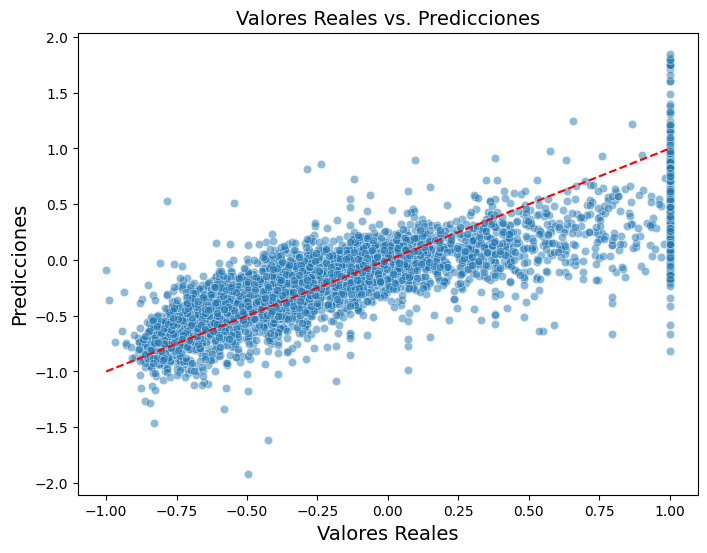

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()

# Clasificación
El conjunto de datos se modifica. En donde ahora, la columna de 'ocean_proximity' contiene las clases para nuestro modelo de clasificación.
Como atributos con las columnas restantes.
La siguiente celda, asigna a la variable X los valores correspondientes a conjunto de caraterísticas para el modelo.
la variable 'y' contiene las clases correspondientes por cada una de las instancias.

In [ ]:
X = df_for_model.drop(columns=['ocean_proximity'])
y = df_for_model['ocean_proximity']

X,y

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0      -0.577689  0.134963            0.568627    -0.955339       -0.960273   
 1      -0.575697  0.130712           -0.215686    -0.638995       -0.657045   
 2      -0.579681  0.128587            1.000000    -0.925479       -0.941341   
 3      -0.581673  0.128587            1.000000    -0.935297       -0.927374   
 4      -0.581673  0.128587            1.000000    -0.917341       -0.913408   
 ...          ...       ...                 ...          ...             ...   
 20635  -0.350598  0.475027           -0.058824    -0.915408       -0.884233   
 20636  -0.374502  0.477152           -0.333333    -0.964647       -0.953755   
 20637  -0.376494  0.464400           -0.372549    -0.885447       -0.849783   
 20638  -0.396414  0.464400           -0.333333    -0.905489       -0.873371   
 20639  -0.380478  0.451647           -0.411765    -0.858436       -0.809125   
 
        population  households  median

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

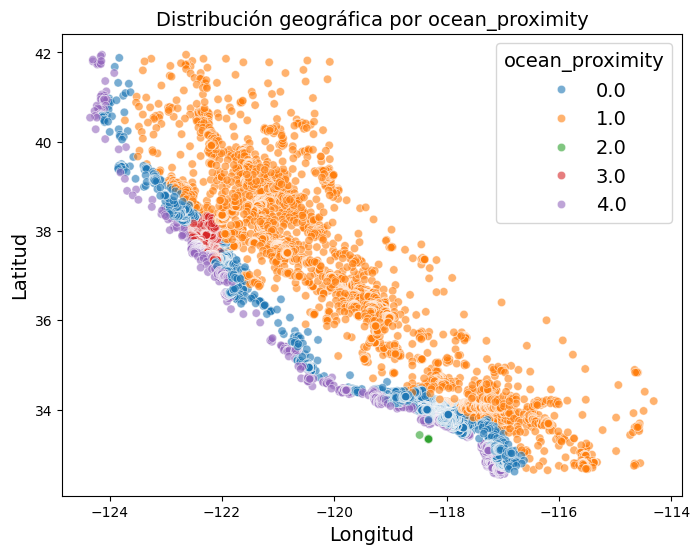

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=y, palette='tab10', alpha=0.6)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución geográfica por ocean_proximity")
plt.legend(title="ocean_proximity")
plt.show()

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Entrenar modelo de clasificación, pueden revisar la bilbioteca sklearn para utilizar diferentes modelos de clasificación.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Predicciones
y_pred_cls = clf.predict(X_test_cls)


In [ ]:

# Evaluación del modelo
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))



Accuracy: 0.9769864341085271

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1795
         1.0       0.99      0.98      0.99      1324
         2.0       1.00      1.00      1.00         1
         3.0       0.98      0.99      0.98       436
         4.0       0.97      0.92      0.94       572

    accuracy                           0.98      4128
   macro avg       0.98      0.98      0.98      4128
weighted avg       0.98      0.98      0.98      4128



In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

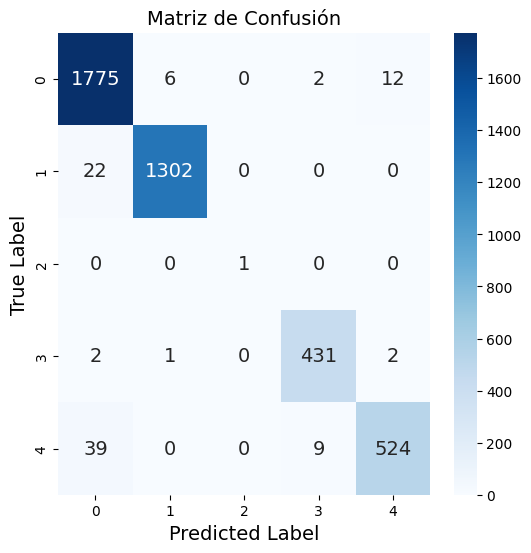

In [ ]:
# Matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión")
plt.show()


# Redes neuronales


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim

Se guardan los datos para entrenar la red neronal en las variables X para las caraterísticas y en Y las etiquetas

In [ ]:
df_for_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.577689,0.134963,0.568627,-0.955339,-0.960273,-0.982118,-0.958888,0.079337,0.804533,3.0
1,-0.575697,0.130712,-0.215686,-0.638995,-0.657045,-0.865579,-0.626048,0.076054,0.416493,3.0
2,-0.579681,0.128587,1.000000,-0.925479,-0.941341,-0.972365,-0.942115,-0.067944,0.390101,3.0
3,-0.581673,0.128587,1.000000,-0.935297,-0.927374,-0.968889,-0.928301,-0.290603,0.345566,3.0
4,-0.581673,0.128587,1.000000,-0.917341,-0.913408,-0.968497,-0.915146,-0.538448,0.349277,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-0.350598,0.475027,-0.058824,-0.915408,-0.884233,-0.952801,-0.891794,-0.853740,-0.739791,1.0
20636,-0.374502,0.477152,-0.333333,-0.964647,-0.953755,-0.980212,-0.962835,-0.716294,-0.743914,1.0
20637,-0.376494,0.464400,-0.372549,-0.885447,-0.849783,-0.943720,-0.857918,-0.834471,-0.681234,1.0
20638,-0.396414,0.464400,-0.333333,-0.905489,-0.873371,-0.958631,-0.885545,-0.811409,-0.712574,1.0


In [ ]:
X_columns = df_for_model.drop(columns=['ocean_proximity']).columns
X_columns = list(X_columns.unique())
#y = df_for_model['ocean_proximity']

In [ ]:
X = df_for_model.drop(columns=['ocean_proximity']).values
y = df_for_model['ocean_proximity'].values

X,y

(array([[-0.57768924,  0.13496281,  0.56862745, ..., -0.95888834,
          0.07933684,  0.80453276],
        [-0.57569721,  0.13071201, -0.21568627, ..., -0.62604835,
          0.07605412,  0.41649313],
        [-0.57968127,  0.12858661,  1.        , ..., -0.94211478,
         -0.06794389,  0.39010148],
        ...,
        [-0.37649402,  0.46439957, -0.37254902, ..., -0.85791811,
         -0.83447125, -0.6812343 ],
        [-0.39641434,  0.46439957, -0.33333333, ..., -0.88554514,
         -0.8114095 , -0.71257438],
        [-0.38047809,  0.45164718, -0.41176471, ..., -0.82601546,
         -0.73949325, -0.69319302]]),
 array([3., 3., 3., ..., 1., 1., 1.]))

El 70 % de los ejemplos se utilizan para realizar el entrenamiento del modelo. El 30 % restante, se utilizan para validar el desempeño del modelo.

"X_train" y "y_train" contienen los ejemplos para entrenamiento "X_test" y "y_test" contienen los ejemplos para validar el desempeño del model

In [ ]:
X.shape

(20640, 9)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Los datos de entrenamiento y de prueba se convierten a tensores.

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
type(X_train)

torch.Tensor

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


Para crear la red neuronal se utiliza PyTorch. Para la creación de dicha red se procede a crear una clase, la cual debe contener "def init()" para inicializar los módulos de la red y poder configurarla.

Por otro lado, también se define "def forward()" en donde se define la estructura de la red.

In [ ]:
class Red_neuronal_1(nn.Module):
  def __init__(self,tam_entrada,tam_oculta1,tam_oculta2,tam_salida):
    super(Red_neuronal_1, self).__init__()
    self.fc1 = nn.Linear(tam_entrada,tam_oculta1)
    self.fc2 = nn.Linear(tam_oculta1, tam_oculta2)
    self.out = nn.Linear(tam_oculta2, tam_salida)

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [ ]:
class Red_neuronal_2(nn.Module):
  def __init__(self,tam_entrada,tam_oculta1,tam_oculta2,tam_oculta3,tam_salida):
    super(Red_neuronal_2, self).__init__()
    self.fc1 = nn.Linear(tam_entrada, tam_oculta1)
    self.fc2 = nn.Linear(tam_oculta1, tam_oculta2)
    self.fc3 = nn.Linear(tam_oculta2, tam_oculta3)
    self.out = nn.Linear(tam_oculta3, tam_salida)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

Se manda a llamar la red y especificamos las neuronas que se tendrán por cada una de las capas.

"Red_neuronal(# neuronas de entrada, # neuronas 1er capa oculta,# neuronas 2da capa oculta, # neuronas capa de salida)"

Se imprime para visualizar la red que se construyó con los parámetros asignados.
Neuronas de entrada: corresponde al número decaracterísticas que tiene el dataset. En nuestro caso con X.shape regresa la tupla (20640,9), donde 20640 es el número de ejemplos de nuestro dataset completo. El valor de 9 corresponde al número de características

In [ ]:
X.shape

(20640, 9)

In [ ]:
neuronas_entrada = X.shape[1]
neuronas_entrada

9

In [ ]:
neuronas_salida = len(np.unique(y))
neuronas_salida

5

In [ ]:
red=Red_neuronal_1(neuronas_entrada,5,15,neuronas_salida)
#red=Red_neuronal_2(neuronas_entrada,20,15,10,neuronas_salida)
red = red.to(device)

print(red)

Red_neuronal_1(
  (fc1): Linear(in_features=9, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=5, bias=True)
)


Se configura la función de pérdida así como la función encargada de optimizar la red por cada época.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(red.parameters(), lr=1e-2)

Se asigna el número de épocas para entrenar la red y se procede a realizar el ciclo de entrenamiento

In [ ]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = red.forward(X_train) #predicción de la red
    loss = criterion(y_pred, y_train) # se obtiene el valor de pérdida
    losses.append(loss) # se guarda en la lista

    #print(f'Epoca: {i:2}  loss: {loss.item():10.8f}') # Imprime el progreso por epoca y el valor de pérdida

    # se optimiza la red con las funciones previamente asignadas
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Se grafica el comportamiento del valor de pérdida a lo largo del entrenamiento

In [ ]:
type(losses)


list

In [ ]:
losses = [tensor.detach().cpu().numpy() for tensor in losses]

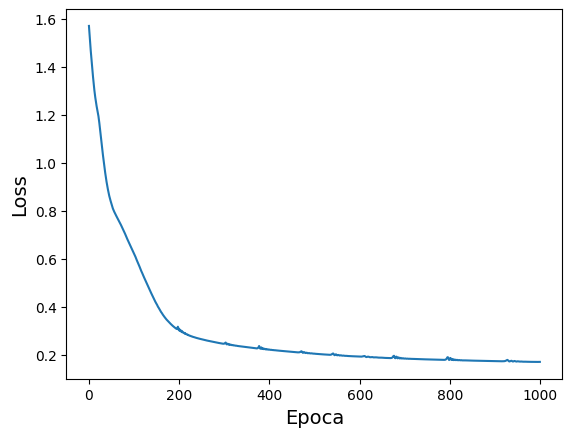

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoca');

Se obtiene una evaluación del modelo con los valores diferentes con los que se entrenó

In [ ]:
predicciones = []
with torch.no_grad():
    for val in X_test:
        res = red.forward(val)
        predicciones.append(res.argmax().item())

In [ ]:
try:
  y_test = y_test.to('cpu')
except:
  pass



Se crea un dataframe para determinar en cuales casos realizó la predicción de manera correcta y en cuales no.

In [ ]:
df = pd.DataFrame({'Prueba': y_test, 'Resultado': predicciones})
df['Correcto'] = ["Si" if corr == predicciones else "No" for corr, predicciones in zip(df['Prueba'], df['Resultado'])]
df

,Prueba,Resultado,Correcto
0,1,1,Si
1,1,1,Si
2,3,3,Si
3,0,0,Si
4,4,4,Si
...,...,...,...
4123,0,0,Si
4124,4,0,No
4125,0,0,Si
4126,1,1,Si


Se convierte el dataframe en arreglo para crear una matriz de confusión

In [ ]:
predicciones=np.asarray(predicciones)
predicciones
y_test=np.asarray(y_test)
y_test

array([1, 1, 3, ..., 0, 1, 0])

Se crea la matriz de confusión

In [ ]:
matriz=confusion_matrix(y_test,predicciones)
matriz

array([[1706,   34,    0,    4,   51],
       [  53, 1269,    0,    2,    0],
       [   0,    0,    0,    0,    1],
       [  15,    0,    0,  418,    3],
       [ 118,    1,    0,   42,  411]])

Se obtiene la exactitud del modelo con los ejemplos de prueba

In [ ]:
print("Accuracy: ",accuracy_score(y_test,predicciones)*100)

Accuracy:  92.15116279069767


Se visualiza de manera gráfica la matriz de confusión con los ejemplos de prueba

In [ ]:
np.unique(ordinal_encoder.categories_)

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
df_plot = pd.DataFrame(matriz,
                     index = np.unique(ordinal_encoder.categories_),
                     columns = np.unique(ordinal_encoder.categories_))

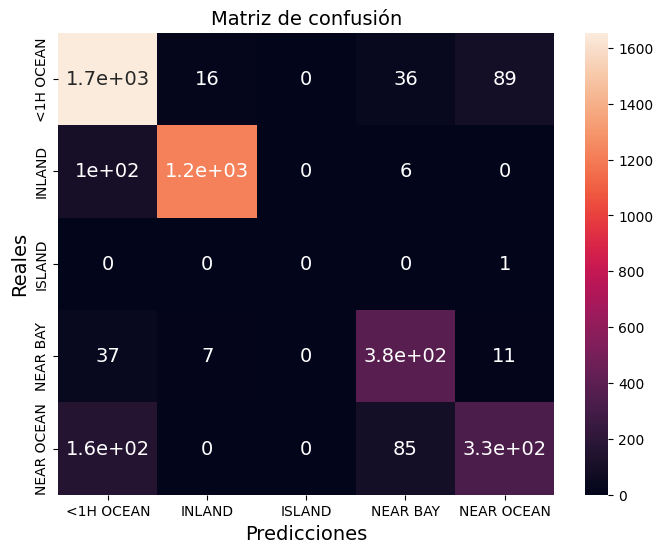

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_plot, annot=True)
plt.title('Matriz de confusión')
plt.ylabel('Reales')
plt.xlabel('Predicciones')
plt.show()